In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)
housing.head() #OPEN DATA FRAME
pd.set_option('display.max_columns', 500)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
#Create seperate numeric-set
housing_numeric = housing[['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars',
                           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                           '3SsnPorch','ScreenPorch','PoolArea','MiscVal', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
#housing_numeric['PID'] = housing_numeric['PID'].astype('str')
#housing_numeric['YrSold'] = pd.to_datetime(housing_numeric['YrSold']).dt.strftime('%Y')
#housing_numeric['GarageYrBlt'] = pd.to_datetime(housing_numeric['GarageYrBlt']).dt.strftime('%Y')
#housing_numeric['YearBuilt'] = pd.to_datetime(housing_numeric['YearBuilt']).dt.strftime('%Y')
#housing_numeric['YearRemodAdd'] = pd.to_datetime(housing_numeric['YearRemodAdd']).dt.strftime('%Y')
#housing_numeric['MoSold'] = pd.to_datetime(housing_numeric['MoSold'],format='%m').dt.strftime('%m')
#housing_numeric['GarageYrBlt'] = housing_numeric['GarageYrBlt'].fillna('1970') #903426160 and 910201180 do have a garage built, but an NA for all others, filled with mode
housing_numeric.fillna(housing_numeric.mean(), inplace=True)
years = housing_numeric[["YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
housing_numeric.to_pickle('housing_numeric.pkl')
housing_numeric['TotalSF'] = housing_numeric['TotalBsmtSF'] + housing_numeric['1stFlrSF'] + housing_numeric['2ndFlrSF']
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_numeric

,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,TotalSF,TotalBath
1,856,126000,68.516053,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,2010,1939.0,3,1939,1950,1712.0,2.0
2,1049,139500,42.000000,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,2009,1984.0,2,1984,1984,2098.0,3.0
3,1001,124900,60.000000,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,2007,1930.0,11,1930,2007,1838.0,1.0
4,1039,114000,80.000000,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0,2009,1940.0,5,1900,2003,1444.0,1.0
5,1665,227000,70.000000,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0,2009,2001.0,11,2001,2001,2475.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,68.516053,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0,2009,1916.0,5,1916,1950,1904.0,1.0
760,1733,139600,68.516053,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0,2009,1955.0,6,1955,1955,1733.0,2.0
761,2002,145000,82.000000,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0,2007,1949.0,8,1949,1950,3003.0,2.0
762,1842,217500,68.516053,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0,2007,2000.0,7,2000,2000,2827.0,3.5


In [10]:
#Create seperate factor-set
housing_factor = housing.drop(['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
housing_factor['PavedDrive'] = housing_factor.PavedDrive.apply(lambda Paved: 1 if Paved != "N" else 0)
housing_factor['CentralAir'] = housing_factor.CentralAir.apply(lambda Central: 1 if Central != "N" else 0) #Convert Y/N to Booleon 
housing_factor[['PID','MSSubClass','OverallQual','OverallCond']] = housing_factor[['PID','MSSubClass','OverallQual','OverallCond']].astype(str)
housing_factor[['PavedDrive','CentralAir']] = housing_factor[['PavedDrive','CentralAir']].astype('bool')
housing_factor #transform all integers into categorical variables
housing_factor.dtypes[housing_factor.dtypes == 'int64']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,909176150,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
2,905476230,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal
3,911128020,30,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,NaN,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,Po,False,NaN,NaN,NaN,WD,Normal
4,535377150,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,NaN,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,False,NaN,NaN,NaN,WD,Normal
5,534177230,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,True,NaN,NaN,NaN,WD,Normal
760,905402060,20,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,NaN,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,True,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
761,909275030,90,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,TA,Typ,NaN,2Types,Unf,TA,TA,True,NaN,NaN,NaN,WD,Normal
762,907192040,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,True,NaN,NaN,NaN,WD,Normal


In [11]:
#Get rid of all NAs
housing_factor['MiscFeature'] = housing_factor['MiscFeature'].fillna('NoFeature')
housing_factor['PoolQC'] = housing_factor['PoolQC'].fillna('NoPool')
housing_factor['Fence'] = housing_factor['Fence'].fillna('NoFence')
housing_factor['GarageQual'] = housing_factor['GarageQual'].fillna('NoGarage')
housing_factor['GarageCond'] = housing_factor['GarageCond'].fillna('NoGarage')
housing_factor['GarageFinish'] = housing_factor['GarageFinish'].fillna('NoGarage')
housing_factor['GarageType'] = housing_factor['GarageType'].fillna('NoGarage')
housing_factor['FireplaceQu'] = housing_factor['FireplaceQu'].fillna('NoFireplace')
housing_factor['BsmtFinType2'] = housing_factor['BsmtFinType2'].fillna('NoBsmt') #528142130 has a basement, but NA for values
housing_factor['BsmtFinType1'] = housing_factor['BsmtFinType1'].fillna('NoBsmt')
housing_factor['BsmtExposure'] = housing_factor['BsmtExposure'].fillna('NoBsmt')
housing_factor['BsmtCond'] = housing_factor['BsmtCond'].fillna('NoBsmt')
housing_factor['BsmtQual'] = housing_factor['BsmtQual'].fillna('NoBsmt') #916386080 is missing an electrical value  veneer
housing_factor['MasVnrType'] = housing_factor['MasVnrType'].fillna('NoVeneer')
housing_factor['Alley'] = housing_factor['Alley'].fillna('NoAlley')

housing_factor.to_pickle('housing_factor.pkl')
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MixedExterior
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,Wd Sdng - Wd Sdng
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,Gd,Typ,NoFireplace,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,HdBoard - HdBoard
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,NoVeneer,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NoFireplace,Detchd,Unf,TA,Po,False,NoPool,NoFence,NoFeature,WD,Normal,MetalSd - MetalSd
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,NoVeneer,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,TA,Typ,NoFireplace,Detchd,Unf,TA,TA,False,NoPool,NoFence,NoFeature,WD,Normal,MetalSd - MetalSd
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,NoVeneer,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,NoFireplace,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,VinylSd - VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,True,NoPool,NoFence,NoFeature,WD,Normal,Wd Sdng - Wd Sdng
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,NoVeneer,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,Ex,True,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,BrkFace - Wd Sdng
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,NoVeneer,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,TA,Typ,NoFireplace,2Types,Unf,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,MetalSd - MetalSd
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,True,NoPool,NoFence,NoFeature,WD,Normal,VinylSd - VinylSd


In [12]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
housing_factor_dummified1 = housing_factor.drop(['PID'], axis=1)
label_encoder = LabelEncoder()
#housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']] = label_encoder.fit_transform(housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']])

housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)

housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)
housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MixedExterior
1,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,4,6,2,5,3,5,5,1,3,4,1,9,4,73
2,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,2,6,3,1,0,5,5,1,3,4,1,9,4,24
3,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,2,6,3,5,3,5,4,0,3,4,1,9,4,35
4,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,4,6,3,5,3,5,5,0,3,4,1,9,4,35
5,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,2,6,3,1,0,5,5,1,3,4,1,9,4,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,1,6,2,5,3,1,4,1,3,4,1,9,4,73
760,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,4,3,2,1,3,5,5,1,3,4,1,9,4,16
761,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4,35
762,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,2,6,5,1,0,5,5,1,3,4,1,9,4,62


In [13]:
pd.set_option('display.max_rows', 500)
#housing_numeric = pd.concat([housing_numeric, years], axis=1)
housing_numeric.to_pickle('housing_numeric.pkl')
housing_factor_dummified1 = pd.concat([housing_numeric, housing_factor_dummified1], axis=1)
#housing_factor_dummified1 = pd.concat([housing_factor_dummified1,housing_factor[["YrSold",'GarageYrBlt','MoSold','PavedDrive','YearBuilt', 'YearRemodAdd', 'CentralAir']]], axis = 1)
housing_factor_dummified1 = housing_factor_dummified1.drop(['SalePrice'], axis=1)

In [14]:
from sklearn.linear_model import LinearRegression
#housing_factor_dummified1 = housing_factor_dummified1.drop(['PID'], axis=1)
lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])

LinearRegression()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 7.100e+01,
        2.118e+03, 3.690e+02, 1.400e+01, 6.000e+00]),
 array([-409463.81593929, -348291.00326374, -287118.19058819,
        -225945.37791264, -164772.56523709, -103599.75256154,
         -42426.93988599,   18745.87278956,   79918.68546511,
         141091.49814066,  202264.31081622]),
 <BarContainer object of 10 artists>)

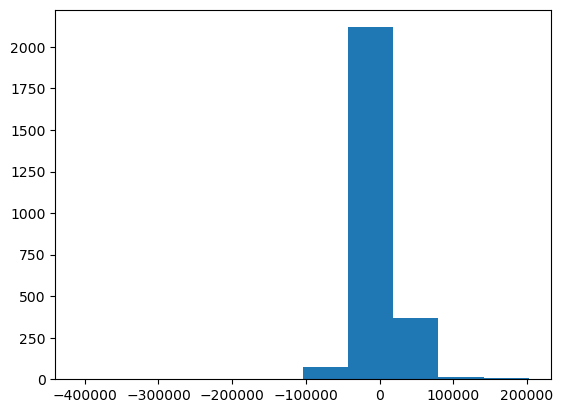

In [15]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [16]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.887
RSS is equal to 1639580912788.767
The intercept is 711422.281
The slopes are [ 2.54825730e+01  5.19444579e+01  4.82025195e-01  3.76768302e+01
  1.17584968e+01  8.32185531e-03 -8.56422205e+00  3.20259659e+00
  1.24698297e+01  8.88438157e+00  4.12836174e+00  2.12533376e+03
 -7.01629997e+02 -1.62600699e+03  2.86617973e+02 -7.42782241e+03
 -1.85435319e+04  2.47628139e+03  6.83925234e+03  3.00947885e+03
  2.19481982e+01  1.16699622e+01 -7.22861057e+00  2.44552385e+01
  6.32897389e-01  4.40654405e+01 -4.47805944e+01 -1.75322081e-02
 -7.50403676e+02  9.75960179e+00 -2.14018784e+02  3.58838287e+02
  7.27479619e+01  2.45568079e+01  2.91820758e+02  6.11347218e+01
 -8.39739655e+02  2.22138270e+04  1.41827069e+03 -7.86023163e+02
 -1.13694426e+03 -3.60215965e+03  3.73343365e+02 -7.32050916e+02
  1.52069861e+02 -2.23629524e+02 -5.29685409e+03 -2.98203478e+03
 -6.87329132e+02  1.87609147e+03  6.71893197e+03  1.67024338e+03
  2.63195255e+03  3.15004128e+02  8.72372569e+02  4.5716

In [17]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

negative slope column names Index(['BsmtUnfSF', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'OpenPorchSF', 'PoolArea', 'MiscVal', 'YrSold', 'MoSold', 'MSZoning',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'MixedExterior'],
      dtype='object')
positive slope column names Index(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'TotalSF', 'TotalBath',
       'MSSubClass', 'Street', 

(array([   2.,    0.,    0.,    4.,    4.,   55., 1198., 1240.,   71.,
           6.]),
 array([-1.48783299, -1.27561261, -1.06339223, -0.85117185, -0.63895146,
        -0.42673108, -0.2145107 , -0.00229032,  0.20993006,  0.42215044,
         0.63437082]),
 <BarContainer object of 10 artists>)

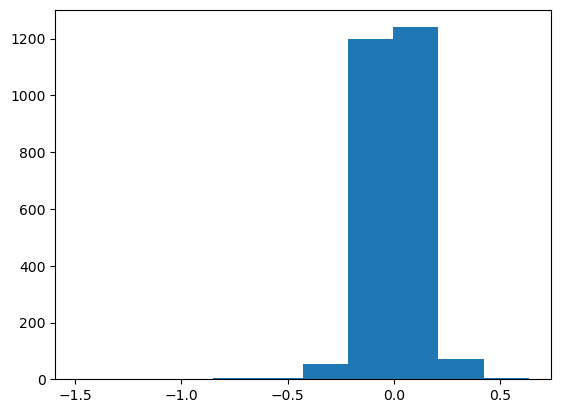

In [18]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [19]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.909
RSS is equal to 35.284
The intercept is 14.465
The slopes are [ 1.16626529e-04  4.25269333e-04  2.15722650e-06  3.69660912e-05
  3.45611199e-05  1.20879894e-05 -2.94843158e-05  1.71647936e-05
  6.69250604e-05  3.09905343e-05  1.87109338e-05  1.11268109e-02
 -7.26268037e-04  1.32417041e-03  2.89530446e-03 -2.00921197e-02
 -8.08572723e-02  1.10157128e-02  3.50022615e-02  2.96381706e-02
  4.59252734e-05  3.84210427e-05 -2.05523639e-06  1.87915628e-04
  7.66307382e-05  2.57006120e-04 -1.51715898e-04  1.04010869e-06
 -4.68060437e-03  2.32928080e-04 -1.04975712e-03  1.93277503e-03
  6.66140642e-04  1.15080388e-04  1.35354995e-02  2.91493187e-03
 -1.23291061e-02  1.31247575e-01  1.79401763e-02 -4.83176250e-03
 -3.50839309e-03 -5.93445167e-02  1.38902526e-03  8.09994223e-03
  9.18988814e-05  4.67674988e-04 -3.04069870e-02 -7.14457740e-03
 -4.06203225e-03  3.76313494e-02  4.88776827e-02  3.12406017e-03
  9.14267750e-03  5.90821923e-03  5.39213471e-03  9.29773654e-03
 -3.57

In [20]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [21]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [22]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('YearBuilt', 'TotalSF', 'OverallCond'), 0.8102173161836371),
 (('YearBuilt', 'TotalSF', 'OverallQual'), 0.8004056504420405),
 (('YearRemodAdd', 'TotalSF', 'OverallQual'), 0.7956230078108323),
 (('GarageCars', 'TotalSF', 'OverallQual'), 0.7881963559596201),
 (('YearBuilt', 'YearRemodAdd', 'TotalSF'), 0.7879893682252572),
 (('GarageYrBlt', 'TotalSF', 'OverallQual'), 0.7870770999023109),
 (('GarageArea', 'TotalSF', 'OverallQual'), 0.7856600743606889),
 (('GarageCars', 'YearRemodAdd', 'TotalSF'), 0.7851973909392979),
 (('BsmtUnfSF', 'TotalSF', 'OverallQual'), 0.7847625165840402),
 (('GarageCars', 'YearBuilt', 'TotalSF'), 0.7824399862623981),
 (('TotalSF', 'TotalBath', 'OverallQual'), 0.7823134678140361),
 (('Fireplaces', 'YearBuilt', 'TotalSF'), 0.78131063613334),
 (('GarageArea', 'YearRemodAdd', 'TotalSF'), 0.7808342521537354),
 (('TotalSF', 'OverallQual', 'CentralAir'), 0.7806156409314969),
 (('GarageArea', 'YearBuilt', 'TotalSF'), 0.7798041404853285),
 (('YearBuilt', 'TotalSF', 'Kitc

In [23]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     319.5
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:20:37   Log-Likelihood:                 1876.0
No. Observations:                2580   AIC:                            -3594.
Df Residuals:                    2501   BIC:                            -3131.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.4653      3.715      3.894      0.000       7.181      21.749
GrLivArea         0.0001   2.04e-05      5.731      0.000    7.67e-05       0.000
LotFrontage       0.0004      0.000      2.798      0.005       0.000       0.001
LotArea        2.157e-06   3.57e-07      6.036      0.000    1.46e-06    2.86e-06
MasVnrArea     3.697e-05   1.77e-05      2.093      0.036    2.33e-06    7.16e-05
BsmtFinSF1     3.456e-05   8.69e-06      3.979      0.000    1.75e-05    5.16e-05
BsmtFinSF2     1.209e-05    1.5e-05      0.808      0.419   -1.73e-05    4.14e-05
BsmtUnfSF     -2.948e-05   8.38e-06     -3.517      0.000   -4.59e-05    -1.3e-05
TotalBsmtSF    1.716e-05   1.11e-05      1.553      0.121   -4.51e-06    3.88e-05
1stFlrSF       6.693e-05   1.29e-05      5.180      0.000    4.16e-05    9.23e-05
2ndFlrSF       3.099e-05    1.1e-05      2.828      0.005     9.5e-06    5.25e-05
LowQualFinSF   1.871e-05   3.67e-05      0.509      0.610   -5.33e-05    9.07e-05
BsmtFullBath      0.0111      0.005      2.254      0.024       0.001       0.021
BsmtHalfBath     -0.0007      0.010     -0.075      0.940      -0.020       0.018
FullBath          0.0013      0.006      0.240      0.811      -0.010       0.012
HalfBath          0.0029      0.006      0.450      0.653      -0.010       0.016
BedroomAbvGr     -0.0201      0.005     -4.287      0.000      -0.029      -0.011
KitchenAbvGr     -0.0809      0.017     -4.894      0.000      -0.113      -0.048
TotRmsAbvGrd      0.0110      0.003      3.335      0.001       0.005       0.017
Fireplaces        0.0350      0.005      7.512      0.000       0.026       0.044
GarageCars        0.0296      0.008      3.788      0.000       0.014       0.045
GarageArea     4.593e-05   2.75e-05      1.667      0.096   -8.09e-06    9.99e-05
WoodDeckSF     3.842e-05   2.06e-05      1.861      0.063   -2.06e-06    7.89e-05
OpenPorchSF   -2.055e-06   3.97e-05     -0.052      0.959   -7.99e-05    7.58e-05
EnclosedPorch     0.0002   4.08e-05      4.610      0.000       0.000       0.000
3SsnPorch      7.663e-05   9.39e-05      0.816      0.414      -0.000       0.000
ScreenPorch       0.0003   4.37e-05      5.880      0.000       0.000       0.000
PoolArea         -0.0002   8.79e-05     -1.726      0.084      -0.000    2.06e-05
MiscVal         1.04e-06   4.91e-06      0.212      0.832   -8.58e-06    1.07e-05
YrSold           -0.0047      0.002     -2.541      0.011      -0.008      -0.001
GarageYrBlt       0.0002      0.000      1.216      0.224      -0.000       0.001
MoSold           -0.0010      0.001     -1.164      0.244      -0.003       0.001
YearBuilt         0.0019      0.000      8.882      0.000       0.002       0.002
YearRemodAdd      0.0007      0.000      3.578      0.000       0.000       0.001
TotalSF           0.0001   1.08e-05     10.684   

In [24]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


OverallCond      3.289784e-61
OverallQual      1.291416e-51
TotalSF          4.395247e-26
SaleCondition    7.437340e-19
YearBuilt        1.221690e-18
Fireplaces       8.086013e-14
Functional       3.674940e-12
ExterQual        8.977554e-11
LotArea          1.817810e-09
CentralAir       3.703416e-09
ScreenPorch      4.654287e-09
GrLivArea        1.119912e-08
1stFlrSF         2.399026e-07
KitchenAbvGr     1.052459e-06
PavedDrive       1.706312e-06
EnclosedPorch    4.227983e-06
HeatingQC        8.630677e-06
KitchenQual      1.041197e-05
ExterCond        1.167555e-05
GarageCond       1.237065e-05
BedroomAbvGr     1.880685e-05
BsmtFinSF1       7.123663e-05
const            1.011667e-04
GarageCars       1.552661e-04
BsmtExposure     2.136715e-04
MSZoning         2.693209e-04
YearRemodAdd     3.533935e-04
Exterior2nd      3.964965e-04
BsmtUnfSF        4.434229e-04
TotRmsAbvGrd     8.642359e-04
TotalBath        9.383659e-04
Street           1.228360e-03
2ndFlrSF         4.722108e-03
LotFrontag

In [25]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


BsmtFinSF2       0.419294
TotalBsmtSF      0.120570
LowQualFinSF     0.610470
BsmtHalfBath     0.939866
FullBath         0.810590
HalfBath         0.652550
GarageArea       0.095607
WoodDeckSF       0.062844
OpenPorchSF      0.958708
3SsnPorch        0.414498
PoolArea         0.084462
MiscVal          0.832196
GarageYrBlt      0.223953
MoSold           0.244385
Alley            0.084301
LandContour      0.372463
Utilities        0.501445
LotConfig        0.370287
LandSlope        0.486086
Neighborhood     0.802727
Condition1       0.870831
RoofStyle        0.335438
Exterior1st      0.320517
Foundation       0.165974
BsmtCond         0.744045
BsmtFinType1     0.101214
BsmtFinType2     0.807077
Heating          0.114950
Electrical       0.605828
FireplaceQu      0.051921
GarageType       0.150826
GarageFinish     0.171744
GarageQual       0.397449
Fence            0.630713
MiscFeature      0.106798
SaleType         0.801740
MixedExterior    0.140310
dtype: float64